# Norms, Cosine Similarity and Linear Correlation
<hr>
This notebook introduces the concept of vector and matrix norms. We will begin by demonstrating how to compute various types of vector and matrix norms. Next, we'll apply the concept of norms to define cosine similarity and explore its applications. Additionally, we'll illustrate the relationship between norms and cosine similarity in addressing linear correlation problems. We will implement linear correlation and provide multiple examples.

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Vector and Matrix Norms

### Vector Norms
A function $\lVert \cdot \rVert: \mathbb{R}^n \to \mathbb{R}$ is a vector norm if: 
* $\lVert x \rVert \geq 0 $ and $\lVert x \rVert = 0 \iff x = 0$
* $\lVert \alpha x \rVert =  \vert \alpha \vert \lVert x \rVert, \alpha \in \mathbb{R}$
* $\lVert x + y \rVert \leq \lVert x \rVert \lVert y \rVert $
An additional property which could be derived is:
* $\vert \lVert x \rVert - \lVert y \rVert \vert \leq \lVert x - y \rVert$
The most used norms are the **p-norms**
$ \lVert x \rVert_{p}  = \left[\sum_{i=1}^{n} \vert x_i \vert ^p \right]^{1/p} $

In [2]:
# Create a vector
x = np.array([2, -5, 3, 1, -8, 10, 11])
print("Vector x: {}".format(x))

Vector x: [ 2 -5  3  1 -8 10 11]


#### Norm 1 (Manhattan distance)
The formulation for the Norm 1 is $ \lVert x \rVert_{1}  = \sum_{i=1}^{n} \vert x_i \vert$

In [3]:
# Compute the norm 1
norm1_x = np.linalg.norm(x,1)
print("Norm 1 of vector x: {}".format(norm1_x))

Norm 1 of vector x: 40.0


#### Norm 2 (Euclidian norm)
The formulation for the Norm 2 is $ \lVert x \rVert_{2}  = \sqrt[2]{\sum_{i=1}^{n} \vert x_i \vert ^2}$

In [4]:
# Compute the norm 2 (Default value for np.linalg.norm is 2, in case of vector)
norm2_x = np.linalg.norm(x)
print("Norm 2 of vector x: {}".format(norm2_x))

Norm 2 of vector x: 18.0


#### Norm infinity
The formulation for the Norm infinity is $ \lim_{p \to \infty} \lVert x \rVert_{p} = \lVert x \rVert_{\infty}  = \max_{1 \leq i \leq n} \vert x_i \vert$

In [5]:
# Compute the norm infinity
norm_inf_x = np.linalg.norm(x, np.inf)
print("Norm infinity of vector x: {}".format(norm_inf_x))

Norm infinity of vector x: 11.0


### Matrix Norms
A function $\lVert \cdot \rVert$ is a matrix norm if: 
* $\lVert A \rVert \geq 0 $ and $\lVert A \rVert = 0 \iff A = 0$
* $\lVert \alpha A \rVert =  \vert \alpha \vert \lVert A \rVert, \forall \alpha \in \mathbb{R}$
* $\lVert A + B \rVert \leq \lVert A \rVert + \lVert B \rVert \forall A,B \in \mathbb{R}^{m \times n}$
* $\lVert AB \rVert \leq \lVert A \rVert \lVert B \rVert \forall A \in \mathbb{R}^{m \times p}, \forall B \in \mathbb{R}^{p \times n}$

In [6]:
# Create a matrix
A = np.array([[-10, -2], [1, -1], [5, 3]])
print("Matrix A:\n{}".format(A))

Matrix A:
[[-10  -2]
 [  1  -1]
 [  5   3]]


#### Matrix Norm induced by Norm 1
The formulation for the Matrix Norm 1 is $ \lVert A \rVert_{1}  = \max_{\lVert x \rVert_{1} = 1} \lVert Ax \rVert_{1} =  \max_{j} \sum_{i}^{} \vert a_{ij} \vert$

In [7]:
# Compute the norm 1
norm1_A = np.linalg.norm(A, 1)
print("Norm 1 of matrix A: {}".format(norm1_A))

Norm 1 of matrix A: 16.0


#### Matrix Norm induced by Norm 2
The formulation for the Matrix Norm 2 is $ \lVert A \rVert_{2} = \max_{\sqrt{x^Tx} = 1} \sqrt{x^TA^TAx}$

In [8]:
# Compute the norm 2
norm2_A = np.linalg.norm(A, 2)
print("Norm 2 of matrix A: {}".format(norm2_A))

Norm 2 of matrix A: 11.641020462856197


#### Matrix Norm induced by Inf-Norm
The formulation for the Matrix Inf-Norm is $ \lVert A \rVert_{\infty} = \max_{\lVert x \rVert_{\infty} = 1} \lVert Ax \rVert_{\infty} =  \max_{i} \sum_{j}^{} \vert a_{ij} \vert$

In [9]:
# Compute the norm infinity
norm_inf_A = np.linalg.norm(A, np.inf)
print("Norm infinity of matrix A: {}".format(norm_inf_A))

Norm infinity of matrix A: 12.0


#### Frobenius Norm
The formulation for the Frobenius Norm is $ \lVert A \rVert_{F} = \sqrt{ \sum_{i,j}^{} \vert a_{ij}\vert^2}= \sqrt{trace(A^TA)}$

In [10]:
# Compute the frobenius norm (Default value for np.linalg.norm is fro, in case of matrix)
norm_frob_A = np.linalg.norm(A)
print("Frobenius Norm of matrix A: {}".format(norm_frob_A))

Frobenius Norm of matrix A: 11.832159566199232


## Cosine similarity
Cosine similarity is a measure of similarity between two non-zero vectors defined in an inner product space. Cosine similarity is the cosine of the angle between the vectors; that is, it is the dot product of the vectors divided by the product of their lengths. It follows that the cosine similarity does not depend on the magnitudes of the vectors, but only on their angle. <br>
Given two vectors $a = \begin{pmatrix} a_1\\ a_2 \\...\\ a_n \end{pmatrix} $ and $b = \begin{pmatrix} b_1\\ b_2\\...\\b_n \end{pmatrix} $ the angle between the two vectors $a$ and $b$ is defined as follow : $ \cos \vartheta = \frac{b^Ta}{\lVert b \rVert \lVert a \rVert}$

### Function to compute the cosine similarity
**NB**: In python there is no difference between row and column vectors; thus, in the function definition we don't need to transpose **b**.
* INPUT
  * **a**: Input vector a
  * **b**: Input vector b
* OUTPUT
  * **theta**: The cosine similarity between the two input vectors **a** and **b**



In [11]:
def cosine_similarity(w,y):
    return np.dot(y, w) / (np.linalg.norm(y) * np.linalg.norm(w))

In [12]:
a = np.array([5, 7])
print("Vector a: {}".format(a))

b = np.array([4, 3])
print("Vector b: {}".format(b))

Vector a: [5 7]
Vector b: [4 3]


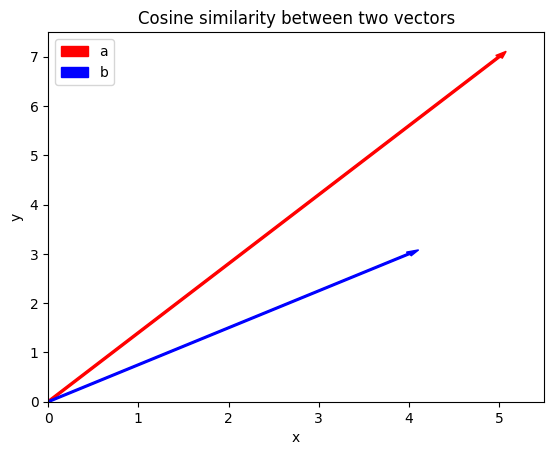

In [13]:
# plot the two vector
plt.arrow(0,0,a[0],a[1], color='r', capstyle="projecting", width=0.03)
plt.arrow(0,0,b[0],b[1], color='b', capstyle="projecting", width=0.03)
plt.xlim([0, 5.5])
plt.ylim([0, 7.5])
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['a','b'])
plt.title('Cosine similarity between two vectors')
plt.show()

In [14]:
# compute the cosine similarity
print("The cosine similarity between a and b is: {}".format(cosine_similarity(a,b)))

The cosine similarity between a and b is: 0.953230637699318


## Linear Correlation
Let $x$ and $y$ be two vectors containing data observation. We want to know if $x$ and $y$ are linearly correlated. So, we want to know if $y$ can be expressed as: $y= \beta_0 e + \beta_1 x$ where $e = \begin{pmatrix} 1\\ 1 \\...\\ 1 \end{pmatrix}$.

### Mean of a vector $x: \mu_x$
The mean gives the control tendency: $\mu_x = \frac{\sum_{i=1}^{n} x_i }{n}$

### Standard deviation of a vector $x: \sigma_x$
The standard deviation measures how much the data are spread around the means. It's computes as: $\sigma_x = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \mu_x)^2}{n}} = \frac{\lVert x - \mu_x e \rVert_2}{\sqrt{n}}$

Implementation of function to compute the standard deviation by matrix notation.
* INPUT
  * **x**: Vector with observations
* OUTPUT
  * **$\sigma_x$**: The standard deviation computed on vector **x**

In [15]:
def sigma_x(x):
    # store the number of rows
    m = x.shape[0]
    
    # define a vector of ones with size mx1 
    e = np.ones((m,1))
    return np.linalg.norm(x - np.mean(x)*e, 2)/np.sqrt(m)

### z-score of a vector $x: z_x$
In order to make some meaningfully "comparison" we need to **standardize**. For a vector $x$, such that $\sigma_x \neq 0$, we compute $z_x = \frac{x - \mu_x e}{\sigma_x}$, such that:
* $\lVert z_x \rVert _2 = \sqrt{n}$
* $\mu_{z_x} = 0$
* $\sigma_{z_x} = 1$

Implementation of function to compute the z-score of a vector.
* INPUT
  * **x**: Vector with observations
* OUTPUT
  * **$z_x$**: The standardize vector **x**

In [16]:
def z_score(x):
    # store the number of rows
    m = x.shape[0]
    
    # define a vector of ones with size mx1 
    e = np.ones((m,1))
    return (x - np.mean(x)*e)/sigma_x(x)

### Correlation coefficient of two vector $x$ and $y: \rho_{xy}$
The mathematical formulation of the correlation coefficient is  = 

$ \cos \vartheta = \frac{{z_x}^Tz_y}{\lVert z_x \rVert_2 \lVert z_y \rVert_2} = \frac{{z_x}^Tz_y}{\sqrt{n}\sqrt{n}} = \frac{(x-\mu_x e)^T(y-\mu_y e)}{\sigma_x \sigma_y n} = \frac{(x-\mu_x e)^T(y-\mu_y e)}{\lVert x - \mu_x e \rVert_2 \lVert y - \mu_y e \rVert_2} = \rho_{xy}$

Implementation of function to compute the correlation coefficient between two vectors.
* INPUT
  * **x**: The vector x of input data.
  * **y**: The vector y of input data.
* OUTPUT
  * **$\rho_{xy}$**: The correlation coefficient between **x** and **y**.

In [17]:
def corr_xy(x, y):
    m = x.shape[0]
    return np.dot(y.T, x)/m

In [18]:
def plot_correlation(x, y, title_plot):
    plt.scatter(x, y)
    plt.title(title_plot)

In [19]:
# Define the number of points
m = 50

In [20]:
# Define observations
x  = np.linspace(1,m,m).reshape(m,1)

# Positive linear correlated data 
y1 = 0.01*x  + 1e-2*np.random.randn(m,1)

# Low linear correlated data
y2 = (0.01+1e-1*np.random.rand(m,1))* x + 1e-1*np.random.rand(m,1)

# Negative linear correlated data
y3 = np.linspace(m,1,m).reshape(m,1) + 1e-1*np.random.randn(m,1)

print("The original dataset x, with y1, y2 and y3:\n"+
      "-------------------------------------------------"+
      "\n{}".format(np.hstack((x,y1,y2,y3))))

The original dataset x, with y1, y2 and y3:
-------------------------------------------------
[[1.00000000e+00 9.35160443e-03 1.36580006e-01 5.01389407e+01]
 [2.00000000e+00 6.97666379e-03 1.57680976e-01 4.92017512e+01]
 [3.00000000e+00 1.19410959e-02 3.66475073e-01 4.80827887e+01]
 [4.00000000e+00 3.30274707e-02 2.49088870e-01 4.68110733e+01]
 [5.00000000e+00 5.59957181e-02 5.56037704e-01 4.60445836e+01]
 [6.00000000e+00 5.56824633e-02 5.45019498e-01 4.50151363e+01]
 [7.00000000e+00 7.45906482e-02 1.54224426e-01 4.40852179e+01]
 [8.00000000e+00 7.68509972e-02 1.27374345e-01 4.30110209e+01]
 [9.00000000e+00 7.34408715e-02 3.95213103e-01 4.20064142e+01]
 [1.00000000e+01 1.13982465e-01 3.88045342e-01 4.10084477e+01]
 [1.10000000e+01 1.12381332e-01 1.19146677e+00 4.01136913e+01]
 [1.20000000e+01 1.03545096e-01 9.35162665e-01 3.91253095e+01]
 [1.30000000e+01 1.35544644e-01 5.05179159e-01 3.79828547e+01]
 [1.40000000e+01 1.25763521e-01 4.59154740e-01 3.70671709e+01]
 [1.50000000e+01 1.52725

In [21]:
# Normalize the vectors dividing by the 2-norm of the vectors
x = x/np.linalg.norm(x,2)
y1 = y1/np.linalg.norm(y1,2)
y2 = y2/np.linalg.norm(y2,2)
y3 = y3/np.linalg.norm(y3,2)
 
print("The normalize dataset x, with y1, y2 and y3:\n"+
      "-------------------------------------------------"+
      "\n{}".format(np.hstack((x,y1,y2,y3))))

The normalize dataset x, with y1, y2 and y3:
-------------------------------------------------
[[0.00482664 0.00452773 0.00960074 0.24169165]
 [0.00965328 0.00337786 0.01108401 0.23717398]
 [0.01447992 0.00578147 0.02576095 0.23178009]
 [0.01930656 0.01599077 0.01750942 0.22564987]
 [0.0241332  0.02711121 0.03908605 0.22195505]
 [0.02895984 0.02695954 0.03831153 0.21699267]
 [0.03378648 0.03611423 0.01084103 0.21251005]
 [0.03861311 0.03720862 0.00895364 0.20733195]
 [0.04343975 0.03555755 0.02778106 0.20248931]
 [0.04826639 0.0551864  0.02727721 0.19767867]
 [0.05309303 0.05441119 0.08375282 0.19336555]
 [0.05791967 0.05013298 0.06573621 0.18860112]
 [0.06274631 0.06562607 0.035511   0.18309399]
 [0.06757295 0.06089038 0.03227577 0.17867999]
 [0.07239959 0.07394444 0.0496221  0.17389206]
 [0.07722623 0.08194501 0.03654677 0.16941948]
 [0.08205287 0.0744939  0.12379246 0.16402691]
 [0.08687951 0.09100814 0.06485708 0.15986794]
 [0.09170615 0.09617029 0.13309955 0.15447833]
 [0.09653279

In [22]:
# Compute the z-score of the data 
zx = z_score(x)
zy1 = z_score(y1)
zy2 = z_score(y2)
zy3 = z_score(y3)

In [23]:
# Compute the cosine of the angle, which is the correlation coefficient
corr_xy1 = corr_xy(zx, zy1)
corr_xy2 = corr_xy(zx, zy2)
corr_xy3 = corr_xy(zx, zy3)

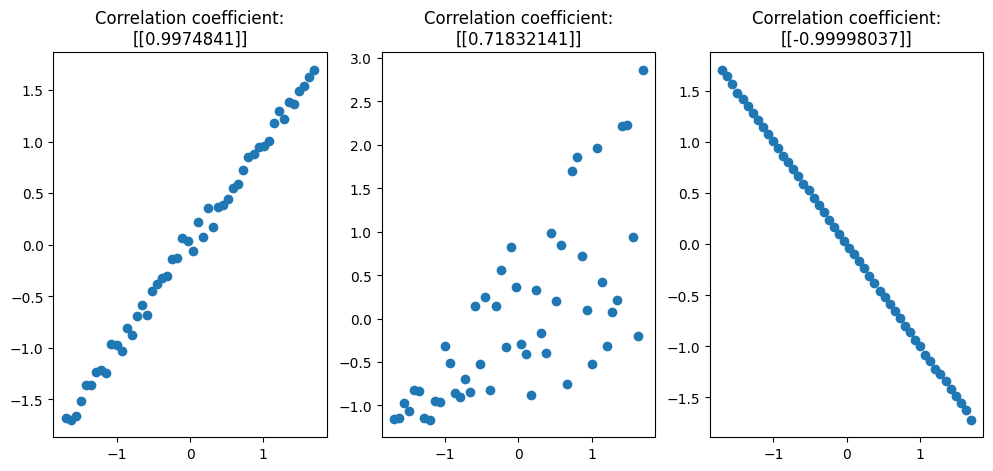

In [24]:
plt.figure(figsize=(12,5))
plt.subplot(1, 3, 1)
plot_correlation(zx, zy1, "Correlation coefficient:\n" + str(corr_xy1))
plt.subplot(1, 3, 2)
plot_correlation(zx, zy2, "Correlation coefficient:\n" + str(corr_xy2))
plt.subplot(1, 3, 3)
plot_correlation(zx, zy3, "Correlation coefficient:\n" + str(corr_xy3))
plt.show()